##**a. Eksplorasi Data (Exploratory Data Analysis)**

### **Import Library**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from google.colab import drive

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import keras.layers as layers
import tensorflow as tf
from keras.models import Sequential
from tensorflow import keras
from keras.layers import LSTM, Dense, Dropout

import warnings
warnings.filterwarnings("ignore")

###**Import Dataset**

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


###**IBM (International Business Machines Corporation) Dataset**

In [ ]:
dataIBM = pd.read_csv('/content/drive/MyDrive/IBM.csv')
dataIBM.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-02,7.713333,7.713333,7.626667,7.626667,0.618153,387200
1,1962-01-03,7.626667,7.693333,7.626667,7.693333,0.623556,288000
2,1962-01-04,7.693333,7.693333,7.613333,7.616667,0.617343,256000
3,1962-01-05,7.606667,7.606667,7.453333,7.466667,0.605185,363200
4,1962-01-08,7.460000,7.460000,7.266667,7.326667,0.593837,544000


In [ ]:
dataIBM.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

Terdapat 7 kolom dari dataset IBM yaitu `Date`, `Open`, `High`, `Low`, `Close`, `Adj Close`, `Volume`

In [ ]:
row, col = dataIBM.shape
print("Jumlah baris dalam data IBM: ", row)
print("Jumlah kolom dalam data IBM: ", col)

Jumlah baris dalam data IBM:  14663
Jumlah kolom dalam data IBM:  7


Data IBM terdiri dari 14663 baris dan 7 kolom.

###**Checking Missing Value and Duplicated Data**

In [ ]:
print('Missing Value on IBM dataset : ')
print(dataIBM.isna().sum())
dataIBM.shape

Missing Value on IBM dataset : 
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


(14663, 7)

Setelah melakukan pengecekan, output 0 dari tiap variable diatas menunjukkan tidak adanya missing value dari semua variable dalam dataset IBM.

In [ ]:
print('Duplicated Data on IBM dataset : ')
print(dataIBM.shape)
print(dataIBM[dataIBM.duplicated()].shape)

Duplicated Data on IBM dataset : 
(14663, 7)
(0, 7)



*   dataIBM mempunyai 14663 baris dan 7 kolom data.
*   Setelah dicheck dengan duplicated() method ternyata tidak ada data yang terduplikasi.



###**Data Distribution**

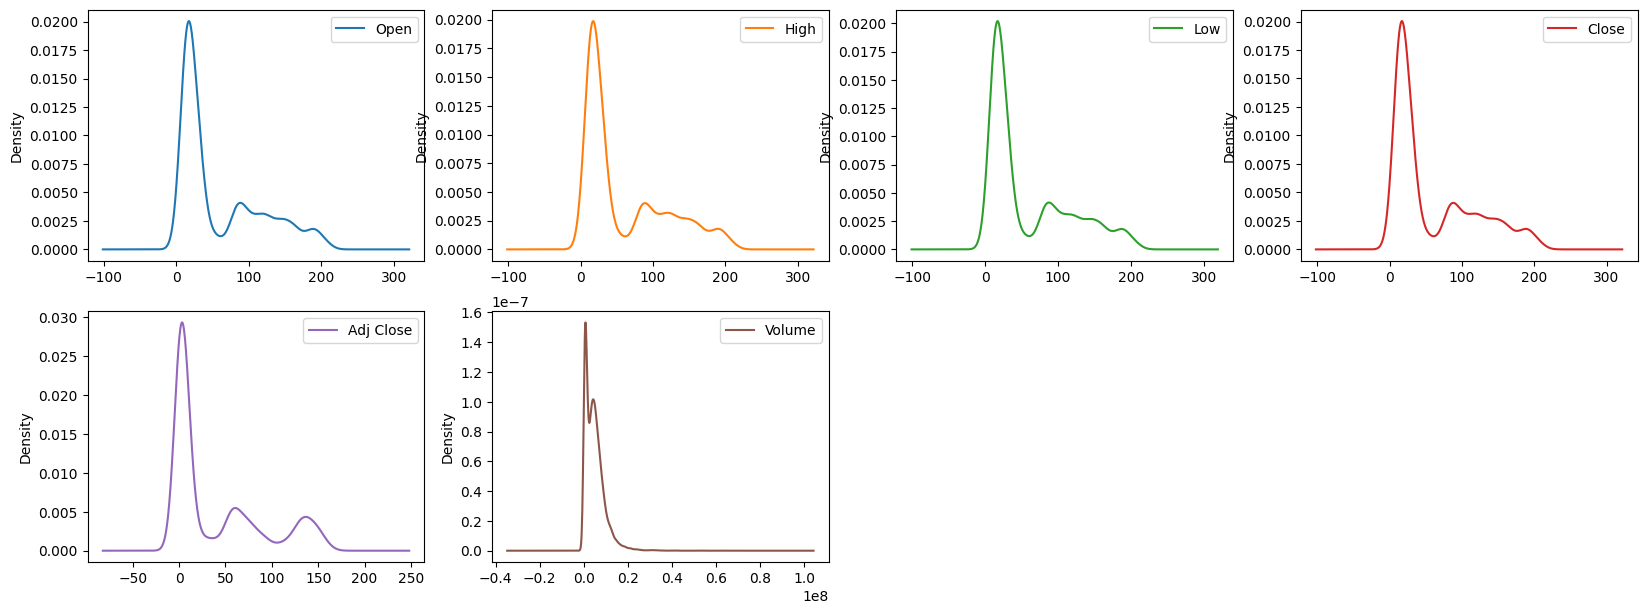

In [ ]:
dataIBM.plot(kind='density', subplots=True, layout=(4,4), figsize=(20, 15), sharex=False)
plt.show()

Output diatas menunjukkan visualisasi distribusi data dari tiap variable. Plot menggunakan `density` menunjukkan frekuensi kemunculan data dari tiap rentang nilai dalam data tersebut.

###**Checking Outliers**

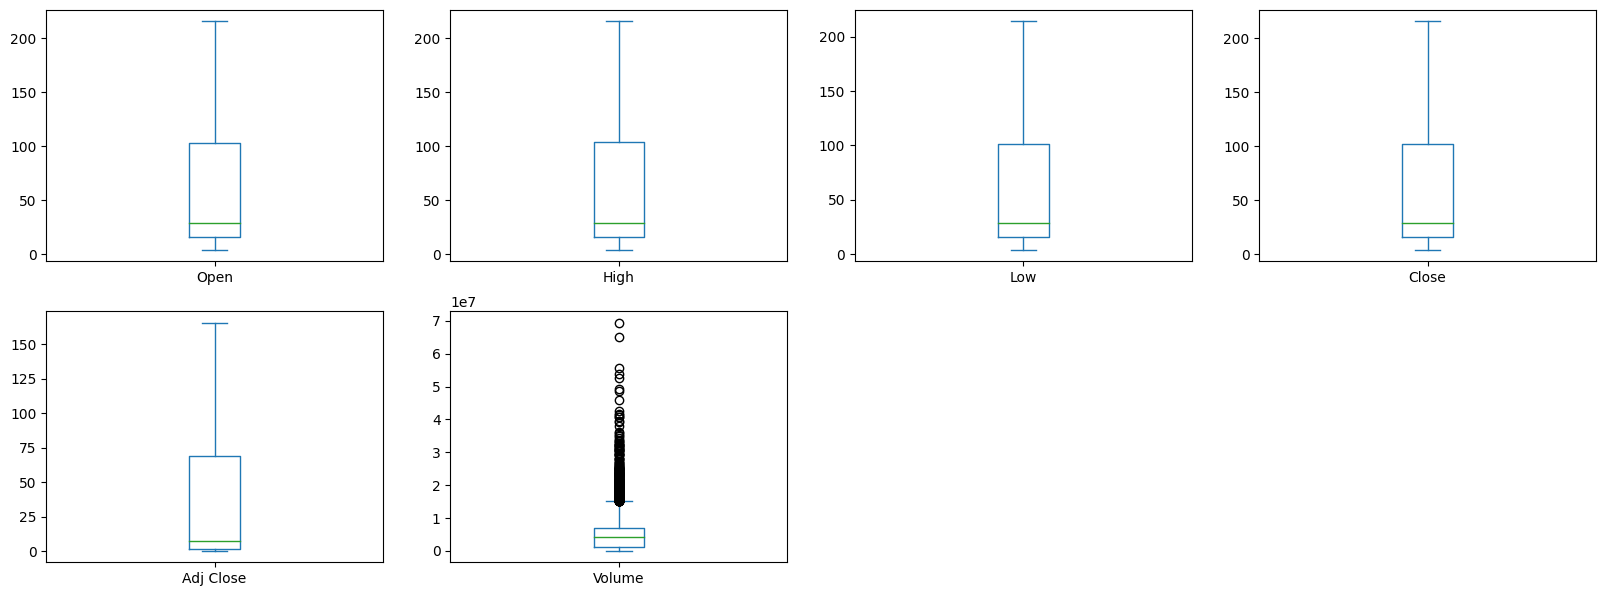

In [ ]:
dataIBM.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(20,15))
plt.show()

Dari output diatas, dapat dilihat hanya variable `Volume` yang memiliki banyak data outliers. Sedangkan, 5 variable lainnya tidak memiliki data outliers. Hal ini sangat wajar karena volume menggambarkan jumlah saham yang berpindah tangan tiap hari (transaksi saham) tentunya akan sangat banyak terjadi dan bervariasi.

###**Convert Date Column**

In [ ]:
dataIBM["Date"] = pd.to_datetime(dataIBM["Date"])  # Convert "Date" column to datetime format
dataIBM.set_index("Date", inplace=True)  # Set "Date" column as index
dataIBM.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1962-01-02,7.713333,7.713333,7.626667,7.626667,0.618153,387200
1962-01-03,7.626667,7.693333,7.626667,7.693333,0.623556,288000
1962-01-04,7.693333,7.693333,7.613333,7.616667,0.617343,256000
1962-01-05,7.606667,7.606667,7.453333,7.466667,0.605185,363200
1962-01-08,7.460000,7.460000,7.266667,7.326667,0.593837,544000


*   Mengubah kolom `Date` dalam dataframe menjadi tipe data datetime untuk memudahkan proses pengolahan data selanjutnya.
*   Menjadikan kolom `Date` yang sudah diubah sebagai index dalam dataframe.



In [ ]:
 dataIBM.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14663 entries, 1962-01-02 to 2020-04-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       14663 non-null  float64
 1   High       14663 non-null  float64
 2   Low        14663 non-null  float64
 3   Close      14663 non-null  float64
 4   Adj Close  14663 non-null  float64
 5   Volume     14663 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 801.9 KB


Setiap kolom pada dataset memiliki 14663 data dengan tipe data yang ada yaitu float dan integer.

###**Using `Date` and `Close` Column**

In [ ]:
IBM_price = pd.DataFrame(dataIBM['Close']).rename(columns={'Close':'Price'})
IBM_price.head()

,Price
Date,
1962-01-02,7.626667
1962-01-03,7.693333
1962-01-04,7.616667
1962-01-05,7.466667
1962-01-08,7.326667


*   Membuat dataframe baru "IBM_price" yang hanya menggunakan kolom `Date` dan `Close`
*   Mengubah nama kolom `Close` menjadi `Price` dan menampilkan isi data teratas dari dataframe terbaru



In [ ]:
IBM_price.tail(3)

,Price
Date,
2020-03-30,112.930000
2020-03-31,110.930000
2020-04-01,105.139999


Text(0, 0.5, 'IBM Price')

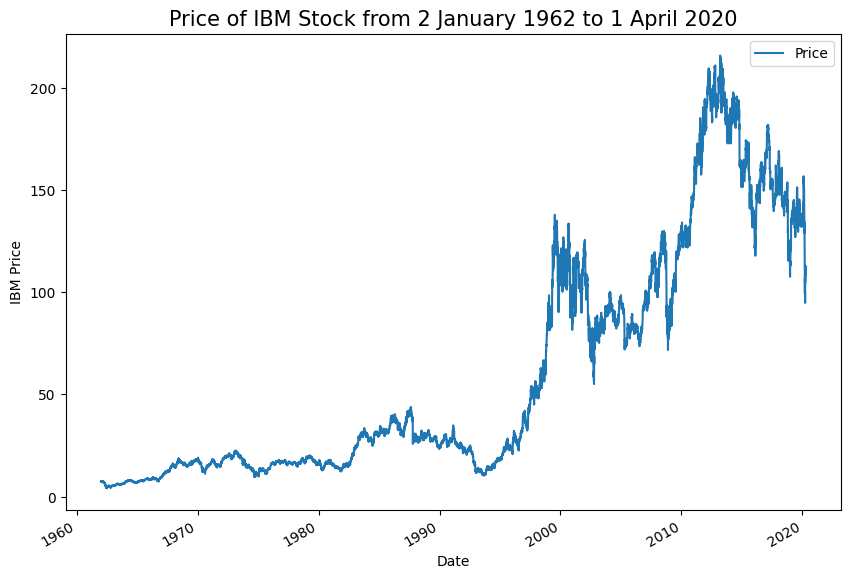

In [ ]:
# Plotting the time series
IBM_price.plot(figsize=(10,7))
plt.title('Price of IBM Stock from 2 January 1962 to 1 April 2020', fontsize=15)
plt.xlabel('Date')
plt.ylabel('IBM Price')

Output diatas menunjukkan grafik *time series* dari harga penutupan saham IBM mulai dari 2 Januari 1962 sampai 1 April 2020.

###**Splitting Time Series Data for Input and Output**


In [ ]:
#change the data into array
timestep = IBM_price.index.to_numpy()
price = IBM_price['Price'].values.astype('float32')
timestep[:10],price[:10]

(array(['1962-01-02T00:00:00.000000000', '1962-01-03T00:00:00.000000000',
        '1962-01-04T00:00:00.000000000', '1962-01-05T00:00:00.000000000',
        '1962-01-08T00:00:00.000000000', '1962-01-09T00:00:00.000000000',
        '1962-01-10T00:00:00.000000000', '1962-01-11T00:00:00.000000000',
        '1962-01-12T00:00:00.000000000', '1962-01-15T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([7.6266665, 7.693333 , 7.616667 , 7.4666667, 7.326667 , 7.4133334,
        7.4266667, 7.5066667, 7.52     , 7.5533333], dtype=float32))

*   Untuk melanjutkan proses pengolahan data, saya mengambil kolom index dataframe "IBM_price" kemudian mengubahnya menjadi numpy array. Mengambil kolom "Price" dari DataFrame "IBM_price" dan mengubahnya menjadi numpy array.
*   Output menghasilkan dua array berisi "timestep" dan "price". Array "timestep" berisi tanggal dalam format datetime dan array "price" berisi harga-harga saham IBM dalam format float.



In [ ]:
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 5 # use a week worth of timesteps to predict the horizon

In [ ]:
# Create function to label windowed data
def windowslabel(x, horizon=1):
    window = x[:, :-horizon]
    label = x[:, -horizon:]
    return window, label

# Test out the window labelling function
window, label = windowslabel(tf.expand_dims(tf.range(6)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(window).numpy()} -> Label: {tf.squeeze(label).numpy()}")

Window: [1 2 3 4 5] -> Label: 6


*   Fungsi diatas bertujuan untuk membagi data x menjadi 2 bagian. Untuk mendapatkan window data, ambil seluruh data kecuali horizon (data terakhir). Kemudian, slicing kembali input data x untuk mendapatkan data terakhir (label).
*   Output diatas menunjukkan nilai-nilai dari window dan label data yang dihasilkan menggunakan fungsi `windowslabel`

In [ ]:
# Create function to view NumPy arrays as windows
def createwindow(x, window_size=5, horizon=1):
    step = np.expand_dims(np.arange(window_size+horizon), axis=0)
    index = step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T
    windowed = x[index]

    windows, labels = windowslabel(windowed, horizon=horizon)

    return windows, labels

# Test out the window creation function
window, label = createwindow(price, window_size=WINDOW_SIZE, horizon=HORIZON)
print(f"Window: {window[0]} -> Label: {label[0]}")

Window: [7.6266665 7.693333  7.616667  7.4666667 7.326667 ] -> Label: [7.4133334]



*   Fungsi `createwindow` digunakan untuk menghasilkan windows dan labels dari data `price` dengan menggunakan `window_size` = 5 dan `horizon` = 1.
*   Output diatas menunjukkan 5 data harga pertama dari variable `Window`. Sedangkan nilai `label` adalah nilai harga berikutnya.



In [ ]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {window[i]} -> Label: {label[i]}")

print("\n")

# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {window[i-3]} -> Label: {label[i-3]}")

Window: [7.6266665 7.693333  7.616667  7.4666667 7.326667 ] -> Label: [7.4133334]
Window: [7.693333  7.616667  7.4666667 7.326667  7.4133334] -> Label: [7.4266667]
Window: [7.616667  7.4666667 7.326667  7.4133334 7.4266667] -> Label: [7.5066667]


Window: [ 94.77 105.48 105.85 112.89 108.03] -> Label: [112.93]
Window: [105.48 105.85 112.89 108.03 112.93] -> Label: [110.93]
Window: [105.85 112.89 108.03 112.93 110.93] -> Label: [105.14]


Output diatas menampilkan tiga pasang data pertama dari window dan label, serta tiga pasang data terakhir dari window dan label.

###**Creating Train, Test, and Validation Set for IBM Dataset**


In [ ]:
def splitdata(windows, labels, test_split=0.1, val_split=0.1):
  # Calculate the sizes of train, test, and validation sets
  num_samples = len(windows)
  train_size = int(num_samples * (1 - test_split - val_split))
  test_size = int(num_samples * test_split)
  val_size = int(num_samples * val_split)

  # Split the data into train, test, and validation sets
  train_windows = windows[:train_size]
  train_labels = labels[:train_size]
  test_windows = windows[train_size:train_size + test_size]
  test_labels = labels[train_size:train_size + test_size]
  val_windows = windows[train_size + test_size:]
  val_labels = labels[train_size + test_size:]

  return train_windows, test_windows, val_windows, train_labels, test_labels, val_labels

Fungsi `splitdata` digunakan untuk membagi data dengan proporsi 80% training set, 10% validation set, dan 10% testing set. Window data dan label dibagi sesuai dengan proporsi yang ditetapkan. Hasilnya adalah 6 variable yaitu `train_windows`, `test_windows`, `val_windows`, `train_labels`, `test_labels`, dan `val_labels`. Masing-masing berisi window data dan label untuk training, validation, dan testing set.

In [ ]:
train_windows, test_windows, val_windows, train_labels, test_labels, val_labels = splitdata(window, label, test_split=0.1, val_split=0.1)

In [ ]:
print('Train set: {} baris x {} kolom'.format(train_windows.shape[0], train_windows.shape[1]))
print('Test set: {} baris x {} kolom'.format(test_windows.shape[0], test_windows.shape[1]))
print('Validation set: {} baris x {} kolom'.format(val_windows.shape[0], val_windows.shape[1]))

Train set: 11726 baris x 5 kolom
Test set: 1465 baris x 5 kolom
Validation set: 1467 baris x 5 kolom


Output diatas menunjukkan jumlah data setelah dibagi menjadi 3 dengan proporsi 80% training set, 10% test set, dan 10% validation set.

In [ ]:
train_windows[:5], train_labels[:5]

(array([[7.6266665, 7.693333 , 7.616667 , 7.4666667, 7.326667 ],
        [7.693333 , 7.616667 , 7.4666667, 7.326667 , 7.4133334],
        [7.616667 , 7.4666667, 7.326667 , 7.4133334, 7.4266667],
        [7.4666667, 7.326667 , 7.4133334, 7.4266667, 7.5066667],
        [7.326667 , 7.4133334, 7.4266667, 7.5066667, 7.52     ]],
       dtype=float32),
 array([[7.4133334],
        [7.4266667],
        [7.5066667],
        [7.52     ],
        [7.5533333]], dtype=float32))

Output diatas merepresentasikan 5 pasang data window dan label dari nilai training set setelah split data.

###**FB (Facebook, Inc) Dataset**

In [ ]:
dataFB = pd.read_csv('/content/drive/MyDrive/FB.csv')
dataFB.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200


In [ ]:
dataFB.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

Terdapat 7 kolom dari dataset Facebook yaitu `Date`, `Open`, `High`, `Low`, `Close`, `Adj Close`, `Volume`

In [ ]:
row, col = dataFB.shape
print("Jumlah baris dalam data FB: ", row)
print("Jumlah kolom dalam data FB: ", col)

Jumlah baris dalam data FB:  1980
Jumlah kolom dalam data FB:  7


Data Facebook terdiri dari 1980 baris dan 7 kolom.

###**Checking Missing Value and Duplicated Data**

In [ ]:
print('Missing Value on FB dataset : ')
print(dataFB.isna().sum())
dataFB.shape

Missing Value on FB dataset : 
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


(1980, 7)

Setelah melakukan pengecekan, output 0 dari tiap variable diatas menunjukkan tidak adanya missing value dari semua variable dalam dataset Facebook.

In [ ]:
print('Duplicated Data on FB dataset : ')
print(dataFB.shape)
print(dataFB[dataFB.duplicated()].shape)

Duplicated Data on FB dataset : 
(1980, 7)
(0, 7)


*   dataFB mempunyai 1980 baris dan 7 kolom.
*   Setelah dicheck dengan duplicated() method ternyata tidak ada data yang terduplikasi.



###**Data Distribution**

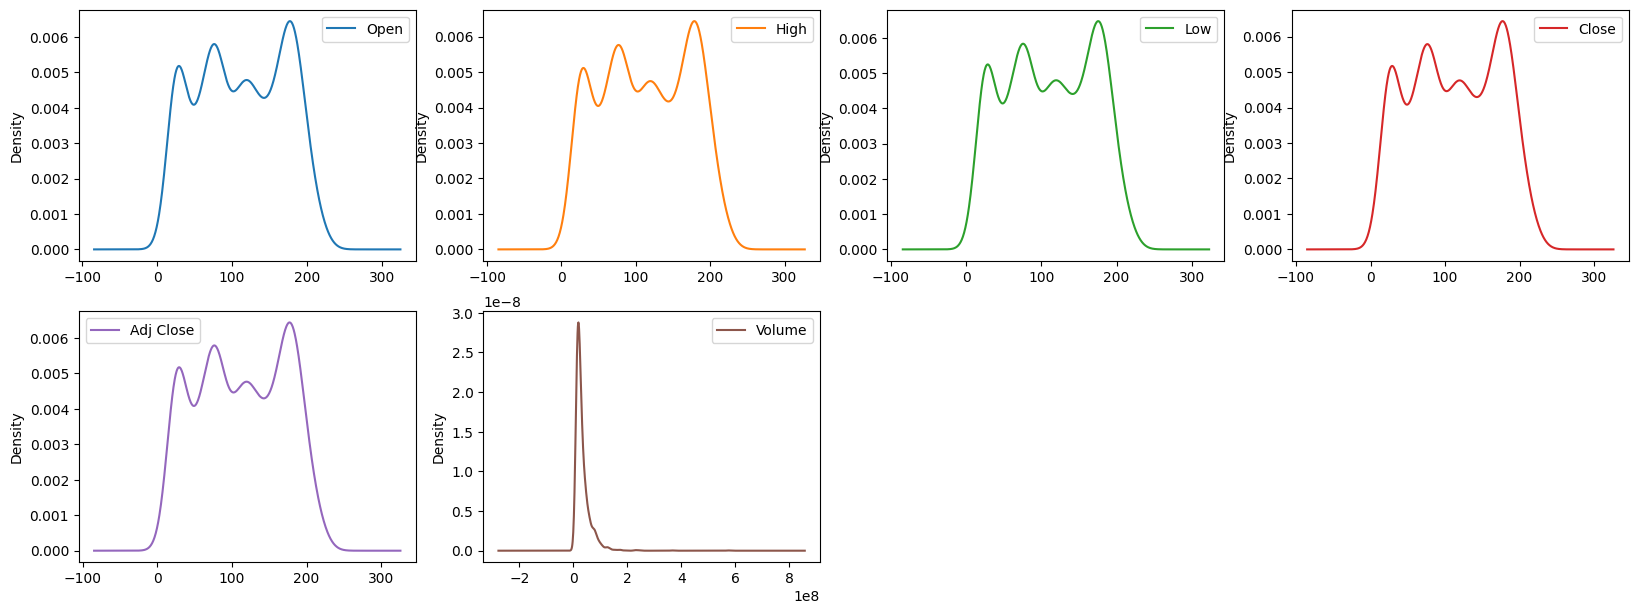

In [ ]:
dataFB.plot(kind='density', subplots=True, layout=(4,4), figsize=(20, 15), sharex=False)
plt.show()

Output diatas menunjukkan visualisasi distribusi data dari tiap variable. Plot menggunakan `density` menunjukkan frekuensi kemunculan data dari tiap rentang nilai dalam data tersebut.

###**Checking Outliers**

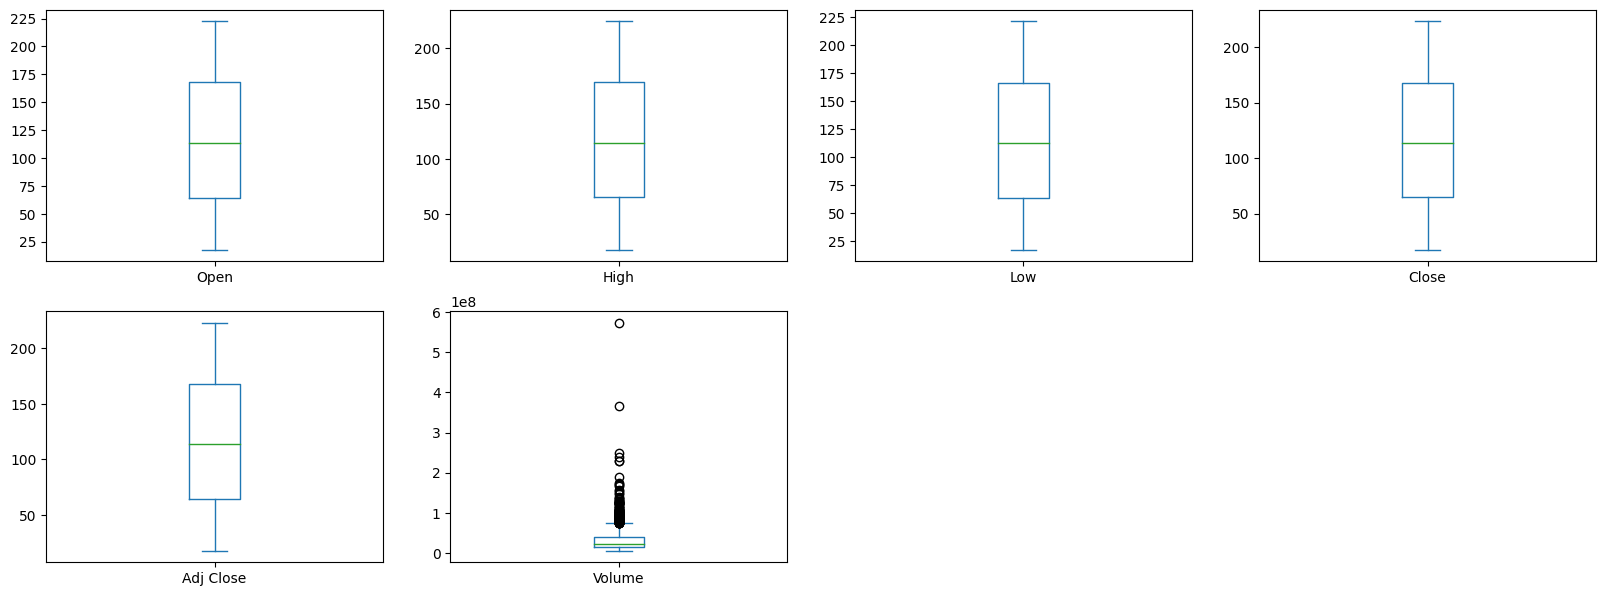

In [ ]:
dataFB.plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(20,15))
plt.show()

Dari output diatas, dapat dilihat hanya variable `Volume` yang memiliki banyak data outliers. Sedangkan, 5 variable lainnya tidak memiliki data outliers. Hal ini sangat wajar karena volume menggambarkan jumlah saham yang berpindah tangan tiap hari (transaksi saham) tentunya akan sangat banyak terjadi dan bervariasi.

###**Convert Date Column**

In [ ]:
# Parse dates and set "Date" column as index
dataFB["Date"] = pd.to_datetime(dataFB["Date"])  # Convert "Date" column to datetime format
dataFB.set_index("Date", inplace=True)  # Set "Date" column as index
dataFB.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200


*   Mengubah kolom `Date` dalam dataframe menjadi tipe data datetime untuk memudahkan proses pengolahan data selanjutnya.
*   Menjadikan kolom `Date` yang sudah diubah sebagai index dalam dataframe.



In [ ]:
dataFB.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1980 entries, 2012-05-18 to 2020-04-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1980 non-null   float64
 1   High       1980 non-null   float64
 2   Low        1980 non-null   float64
 3   Close      1980 non-null   float64
 4   Adj Close  1980 non-null   float64
 5   Volume     1980 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 108.3 KB


Setiap kolom pada dataset memiliki 1980 data dengan tipe data yang ada yaitu float dan integer.

###**Using `Date` and `Close` Column**

In [ ]:
FB_price = pd.DataFrame(dataFB['Close']).rename(columns={'Close':'Price'})
FB_price.head()

,Price
Date,
2012-05-18,38.230000
2012-05-21,34.029999
2012-05-22,31.000000
2012-05-23,32.000000
2012-05-24,33.029999


*   Membuat dataframe baru "FB_price" yang hanya menggunakan kolom `Date` dan `Close`
*   Mengubah nama kolom `Close` menjadi `Price` dan menampilkan isi data teratas dari dataframe terbaru



In [ ]:
FB_price.tail(3)

,Price
Date,
2020-03-30,165.949997
2020-03-31,166.800003
2020-04-01,159.600006


Text(0, 0.5, 'Facebook Price')

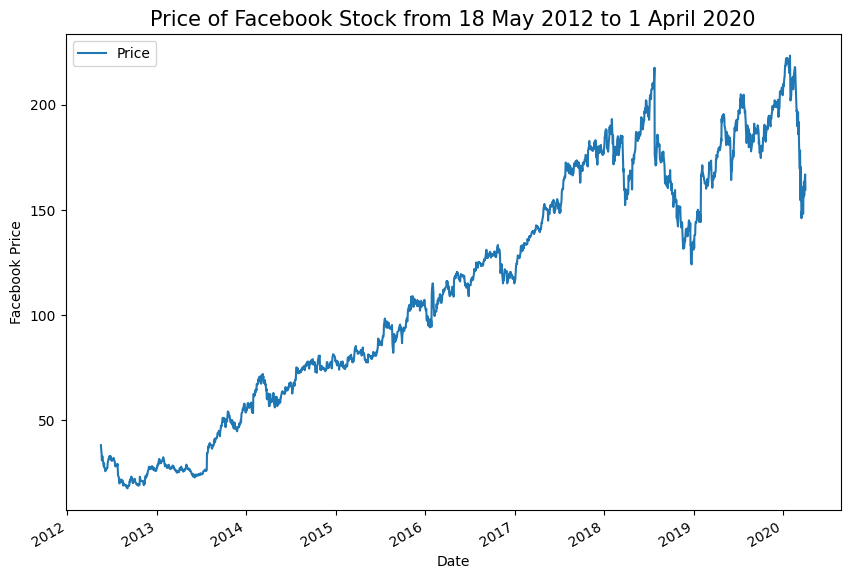

In [ ]:
# Plotting the time series
FB_price.plot(figsize=(10,7))
plt.title('Price of Facebook Stock from 18 May 2012 to 1 April 2020', fontsize=15)
plt.xlabel('Date')
plt.ylabel('Facebook Price')

Output diatas menunjukkan grafik *time series* dari harga penutupan saham Facebook mulai dari 18 May 2012 sampai 1 April 2020.

###**Splitting Time Series Data for Input and Output**


In [ ]:
#change the data into array
timestep2 = FB_price.index.to_numpy()
price2 = FB_price['Price'].values.astype('float32')
timestep2[:10],price2[:10]

(array(['2012-05-18T00:00:00.000000000', '2012-05-21T00:00:00.000000000',
        '2012-05-22T00:00:00.000000000', '2012-05-23T00:00:00.000000000',
        '2012-05-24T00:00:00.000000000', '2012-05-25T00:00:00.000000000',
        '2012-05-29T00:00:00.000000000', '2012-05-30T00:00:00.000000000',
        '2012-05-31T00:00:00.000000000', '2012-06-01T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([38.23, 34.03, 31.  , 32.  , 33.03, 31.91, 28.84, 28.19, 29.6 ,
        27.72], dtype=float32))

*   Untuk melanjutkan proses pengolahan data, saya mengambil kolom index dataframe "FB_price" kemudian mengubahnya menjadi numpy array. Mengambil kolom "Price" dari DataFrame "FB_price" dan mengubahnya menjadi numpy array.
*   Output menghasilkan dua array berisi "timestep2" dan "price2". Array "timestep" berisi tanggal dalam format datetime dan array "price"2 berisi harga-harga saham Facebook dalam format float.



In [ ]:
HORIZON_2 = 1 # predict 1 step at a time
WINDOW_SIZE_2 = 5 # use a week worth of timesteps to predict the horizon

In [ ]:
# Create function to label windowed data
def labelledwindows(x, horizon=1):
    window2 = x[:, :-horizon]
    label2 = x[:, -horizon:]
    return window2, label2

# Test out the window labelling function
window2, label2 = labelledwindows(tf.expand_dims(tf.range(6)+1, axis=0), horizon=HORIZON_2)
print(f"Window: {tf.squeeze(window2).numpy()} -> Label: {tf.squeeze(label2).numpy()}")

Window: [1 2 3 4 5] -> Label: 6


*   Fungsi diatas bertujuan untuk membagi data x menjadi 2 bagian. Untuk mendapatkan window data, ambil seluruh data kecuali horizon (data terakhir). Kemudian, slicing kembali input data x untuk mendapatkan data terakhir (label).
*   Output diatas menunjukkan nilai-nilai dari window dan label data yang dihasilkan menggunakan fungsi `labelledwindows`

In [ ]:
# Create function to view NumPy arrays as windows
def createwindow2(x, window_size=5, horizon=1):
    step2 = np.expand_dims(np.arange(window_size+horizon), axis=0)
    index2 = step2 + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T
    windowed2 = x[index2]

    windows2, labels2 = labelledwindows(windowed2, horizon=horizon)

    return windows2, labels2

# Test out the window creation function
window2, label2 = createwindow2(price2, window_size=WINDOW_SIZE_2, horizon=HORIZON_2)
print(f"Window: {window2[0]} -> Label: {label2[0]}")

Window: [38.23 34.03 31.   32.   33.03] -> Label: [31.91]



*   Fungsi `createwindow2` digunakan untuk menghasilkan windows dan labels dari data `price` dengan menggunakan `window_size` = 5 dan `horizon` = 1.
*   Output diatas menunjukkan 5 data harga pertama dari variable `window2`. Sedangkan nilai `label2` adalah nilai harga berikutnya.



In [ ]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {window2[i]} -> Label: {label2[i]}")

print("\n")

# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {window2[i-3]} -> Label: {label2[i-3]}")

Window: [38.23 34.03 31.   32.   33.03] -> Label: [31.91]
Window: [34.03 31.   32.   33.03 31.91] -> Label: [28.84]
Window: [31.   32.   33.03 31.91 28.84] -> Label: [28.19]


Window: [148.1  160.98 156.21 163.34 156.79] -> Label: [165.95]
Window: [160.98 156.21 163.34 156.79 165.95] -> Label: [166.8]
Window: [156.21 163.34 156.79 165.95 166.8 ] -> Label: [159.6]


Output diatas menampilkan tiga pasang data pertama dari window dan label, serta tiga pasang data terakhir dari window dan label.

###**Creating Train, Test, and Validation Set for FB Dataset**


In [ ]:
def splitdata2(windows2, labels2, test_split=0.1, val_split=0.1):
  # Calculate the sizes of train, test, and validation sets
  num_samples2 = len(windows2)
  train_size2 = int(num_samples2 * (1 - test_split - val_split))
  test_size2 = int(num_samples2 * test_split)
  val_size2 = int(num_samples2 * val_split)

  # Split the data into train, test, and validation sets
  train_windows2 = windows2[:train_size2]
  train_labels2 = labels2[:train_size2]
  test_windows2 = windows2[train_size2:train_size2 + test_size2]
  test_labels2 = labels2[train_size2:train_size2 + test_size2]
  val_windows2 = windows2[train_size2 + test_size2:]
  val_labels2 = labels2[train_size2 + test_size2:]

  return train_windows2, test_windows2, val_windows2, train_labels2, test_labels2, val_labels2

Fungsi `splitdata` digunakan untuk membagi data dengan proporsi 80% training set, 10% validation set, dan 10% testing set. Window data dan label dibagi sesuai dengan proporsi yang ditetapkan. Hasilnya adalah 6 variable yaitu `train_windows2`, `test_windows2`, `val_windows2`, `train_labels2`, `test_labels2`, dan `val_labels2`. Masing-masing berisi window data dan label untuk training, validation, dan testing set.

In [ ]:
train_windows2, test_windows2, val_windows2, train_labels2, test_labels2, val_labels2 = splitdata(window2, label2, test_split=0.1, val_split=0.1)

In [ ]:
print('Train set: {} baris x {} kolom'.format(train_windows2.shape[0], train_windows2.shape[1]))
print('Test set: {} baris x {} kolom'.format(test_windows2.shape[0], test_windows2.shape[1]))
print('Validation set: {} baris x {} kolom'.format(val_windows2.shape[0], val_windows2.shape[1]))

Train set: 1580 baris x 5 kolom
Test set: 197 baris x 5 kolom
Validation set: 198 baris x 5 kolom


Output diatas menunjukkan jumlah data setelah dibagi menjadi 3 dengan proporsi 80% training set, 10% test set, dan 10% validation set.

In [ ]:
train_windows2[:5], train_labels2[:5]

(array([[38.23, 34.03, 31.  , 32.  , 33.03],
        [34.03, 31.  , 32.  , 33.03, 31.91],
        [31.  , 32.  , 33.03, 31.91, 28.84],
        [32.  , 33.03, 31.91, 28.84, 28.19],
        [33.03, 31.91, 28.84, 28.19, 29.6 ]], dtype=float32),
 array([[31.91],
        [28.84],
        [28.19],
        [29.6 ],
        [27.72]], dtype=float32))

Output diatas merepresentasikan 5 pasang data window dan label dari nilai training set setelah split data.

##**b. Arsitektur Baseline LSTM**

###**Architecture for IBM Dataset**

In [ ]:
# Define the baseline model
def create_baseline_model():
    model = Sequential()
    model.add(LSTM(units=50, activation='relu', input_shape=(WINDOW_SIZE, HORIZON)))
    model.add(Dense(units=1))
    return model

# Create the baseline model
baseline_model = create_baseline_model()

# Compile the model
baseline_model.compile(loss='mse', optimizer='adam')

# Print the model summary
baseline_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


*    Model diatas menunjukkan arsitektur menggunakan LSTM dengan 50 unit (jumlah neuron) di dalamnya. Jumlah parameter pada layer ini adalah 10,400.
*   Model menggunakan fungsi aktivasi ReLU dan input shape sebesar (WINDOW_SIZE, HORIZON). Ini berarti jumlah timestep yang digunakan dalam satu window sebesar `WINDOW_SIZE` dengan features sebanyak 1 (horizon). `WINDOW_SIZE` sendiri bernilai 5.
*   Menggunakan lapisan dense dengan 1 unit untuk menghasilkan output. Lapisan ini memiliki 51 parameter.
*   Total parameter dalam model ini adalah 10,451.
*   Model di-compile menggunakan mean squared error (MSE) sebagai loss function dan optimizer `adam`.


In [ ]:
# Train the model
history = baseline_model.fit(train_windows, train_labels,
                             validation_data=(val_windows, val_labels),
                             epochs=15, batch_size=32)

# Evaluate the model on the test set
test_loss = baseline_model.evaluate(test_windows, test_labels)
print("Test Loss:", test_loss)

Epoch 1/15
367/367 [==============================] - 3s 5ms/step - loss: 235.8301 - val_loss: 14.4941
Epoch 2/15
367/367 [==============================] - 2s 4ms/step - loss: 2.3412 - val_loss: 8.8454
Epoch 3/15
367/367 [==============================] - 2s 6ms/step - loss: 1.8827 - val_loss: 8.2123
Epoch 4/15
367/367 [==============================] - 2s 6ms/step - loss: 1.7252 - val_loss: 9.1174
Epoch 5/15
367/367 [==============================] - 2s 5ms/step - loss: 1.5991 - val_loss: 18.1294
Epoch 6/15
367/367 [==============================] - 2s 4ms/step - loss: 1.5901 - val_loss: 9.1479
Epoch 7/15
367/367 [==============================] - 1s 4ms/step - loss: 1.4802 - val_loss: 30.0717
Epoch 8/15
367/367 [==============================] - 1s 4ms/step - loss: 1.4618 - val_loss: 9.5764
Epoch 9/15
367/367 [==============================] - 2s 4ms/step - loss: 1.3710 - val_loss: 5.4875
Epoch 10/15
367/367 [==============================] - 2s 4ms/step - loss: 1.3554 - val_loss: 1

*   Dalam proses training, input data berupa `train_windows` dan `train_labels`. Selain itu, validation set juga digunakan sebagai validasi dari performa model tiap epoch.
*   Model diuji (train) dengan 15 epoch (iterasi) dan batch size sebesar 32.
*   Training loss dan validation loss berkurang secara bertahap secara  konsisten.
*   Nilai training loss berkisar antara 1.1 - 2.3, tetapi dalam epoch pertama nilai loss cukup tinggi. Sedangkan, untuk validation loss berkisar antara 4.62 - 14.49. Dengan nilai loss yang cukup tinggi di epoch ke-7.
*   Hasil evaluasi ditampilkan menggunakan nilai loss pada testing set sebesar 5.11.


###**Architecture for FB Dataset**

In [ ]:
# Define the baseline model
def create_baseline_model2():
    model_2 = Sequential()
    model_2.add(LSTM(units=50, activation='relu', input_shape=(WINDOW_SIZE_2, HORIZON_2)))
    model_2.add(Dense(units=1))
    return model_2

# Create the baseline model
baselinemodel2 = create_baseline_model2()

# Compile the model
baselinemodel2.compile(loss='mse', optimizer='adam')

# Print the model summary
baselinemodel2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 50)                10400     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


*    Model diatas menunjukkan arsitektur menggunakan LSTM dengan 50 unit (jumlah neuron) di dalamnya. Jumlah parameter pada layer ini adalah 10,400.
*   Model menggunakan fungsi aktivasi ReLU dan input shape sebesar (WINDOW_SIZE, HORIZON). Ini berarti jumlah timestep yang digunakan dalam satu window sebesar `WINDOW_SIZE` dengan features sebanyak 1 (horizon). `WINDOW_SIZE` sendiri bernilai 5.
*   Menggunakan lapisan dense dengan 1 unit untuk menghasilkan output. Lapisan ini memiliki 51 parameter.
*   Total parameter dalam model ini adalah 10,451.
*   Model di-compile menggunakan mean squared error (MSE) sebagai loss function dan optimizer `adam`.


In [ ]:
# Train the model
history2 = baselinemodel2.fit(train_windows2, train_labels2,
                             validation_data=(val_windows2, val_labels2),
                             epochs=15, batch_size=32)

# Evaluate the model on the test set
test_loss2 = baselinemodel2.evaluate(test_windows2, test_labels2)
print("Test Loss:", test_loss2)

Epoch 1/15
50/50 [==============================] - 2s 9ms/step - loss: 2557.5459 - val_loss: 39.8566
Epoch 2/15
50/50 [==============================] - 0s 5ms/step - loss: 12.5659 - val_loss: 37.1642
Epoch 3/15
50/50 [==============================] - 0s 4ms/step - loss: 10.3851 - val_loss: 23.5494
Epoch 4/15
50/50 [==============================] - 0s 5ms/step - loss: 7.4389 - val_loss: 20.1432
Epoch 5/15
50/50 [==============================] - 0s 5ms/step - loss: 7.2631 - val_loss: 20.3337
Epoch 6/15
50/50 [==============================] - 0s 5ms/step - loss: 7.0732 - val_loss: 19.1688
Epoch 7/15
50/50 [==============================] - 0s 4ms/step - loss: 6.6661 - val_loss: 24.7586
Epoch 8/15
50/50 [==============================] - 0s 4ms/step - loss: 6.9357 - val_loss: 18.9649
Epoch 9/15
50/50 [==============================] - 0s 5ms/step - loss: 6.9294 - val_loss: 21.4991
Epoch 10/15
50/50 [==============================] - 0s 5ms/step - loss: 5.7621 - val_loss: 22.8072
Epoc

*   Dalam proses training, input data berupa `train_windows` dan `train_labels`. Selain itu, validation set juga digunakan sebagai validasi dari performa model tiap epoch.
*   Model diuji (train) dengan 15 epoch (iterasi) dan batch size sebesar 32.
*   Training loss dan validation loss berkurang secara bertahap secara  konsisten.
*   Nilai training loss berkisar antara 5.3 - 12.56, tetapi dalam epoch pertama nilai loss cukup tinggi. Sedangkan, untuk validation loss berkisar antara 17.72 - 39.85.
*   Hasil evaluasi ditampilkan menggunakan nilai loss pada testing set sebesar 15.49.


##**c. Modifikasi Arsitektur**

###**Modification for IBM Dataset**

In [ ]:
# Define the baseline model
def modif_model():
    model = Sequential()
    model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(WINDOW_SIZE, HORIZON)))
    model.add(LSTM(units=50, activation='relu'))
    model.add(Dense(units=1))
    return model

# Create the baseline model
baseline_model_modified = modif_model()

# Compile the model
baseline_model_modified.compile(loss='mse', optimizer='adam')

# Print the model summary
baseline_model_modified.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 5, 50)             10400     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


*   Modifikasi secara keseluruhan yang saya lakukan adalah menambahkan layer LSTM dan melakukan tuning hyperparameters. Penambahan layer LSTM dilakukan agar model dapat mempelajari pola yang lebih kompleks dalam time series data. Tuning hyperparameter yang saya lakukan dengan menambahkan jumlah epochs dan batch size untuk meningkatkan performa model.
*   Output diatas menunjukkan hasil model LSTM yang sudah dimodifikasi dari baseline sebelumnya. Model ini terdiri dari 2 lapisan LSTM dengan 50 unit (jumlah neuron) di tiap lapisannya.


*   Lapisan pertama model menggunakan `return_sequences=True` untuk menghasilkan output dalam urutan yang sama seperti inputnya dengan fungsi aktivasi ReLU. Total parameter dalam lapisan ini adalah 10,400.
*   Lapisan kedua tidak menggunakan` return_sequences=True`, sehingga outputnya hanya menghasilkan satu nilai untuk setiap input sequence. Total parameter dalam lapisan ini adalah 20,200.
*   Menggunakan lapisan dense 1 unit untuk menghasilkan output. Lapisan ini memiliki 51 parameter.
*   Total parameter dalam model ini adalah 30,651.
*   Model di-compile menggunakan mean squared error (MSE) sebagai loss function dan optimizer `adam`.




In [ ]:
# Train the model
history = baseline_model_modified.fit(train_windows, train_labels,
                             validation_data=(val_windows, val_labels),
                             epochs=25, batch_size=64)

# Evaluate the model on the test set
test_loss = baseline_model_modified.evaluate(test_windows, test_labels)
print("Test Loss:", test_loss)

Epoch 1/25
184/184 [==============================] - 6s 10ms/step - loss: 136.0517 - val_loss: 12.4430
Epoch 2/25
184/184 [==============================] - 2s 9ms/step - loss: 2.4051 - val_loss: 10.7049
Epoch 3/25
184/184 [==============================] - 1s 8ms/step - loss: 1.7595 - val_loss: 4.8502
Epoch 4/25
184/184 [==============================] - 1s 8ms/step - loss: 1.4428 - val_loss: 5.7396
Epoch 5/25
184/184 [==============================] - 2s 11ms/step - loss: 1.4369 - val_loss: 5.6141
Epoch 6/25
184/184 [==============================] - 3s 16ms/step - loss: 1.3872 - val_loss: 8.1830
Epoch 7/25
184/184 [==============================] - 2s 10ms/step - loss: 1.2791 - val_loss: 5.4333
Epoch 8/25
184/184 [==============================] - 1s 8ms/step - loss: 1.3199 - val_loss: 11.8303
Epoch 9/25
184/184 [==============================] - 2s 8ms/step - loss: 1.2488 - val_loss: 6.6591
Epoch 10/25
184/184 [==============================] - 1s 8ms/step - loss: 1.2887 - val_los

*   Dalam proses training, input data berupa `train_windows` dan `train_labels`. Selain itu, validation set juga digunakan sebagai validasi dari performa model tiap epoch.
*   Model modifikasi diuji (train) dengan menaikkan nilai epoch menjadi 25 epoch dan batch size sebesar 64.
*   Training loss dan validation loss berkurang secara bertahap secara  konsisten.
*   Nilai training loss berkisar antara 1.1 - 2.4, tetapi dalam epoch pertama nilai loss cukup tinggi. Sedangkan, untuk validation loss berkisar antara 4.6 - 12.44.
*   Hasil evaluasi ditampilkan menggunakan nilai loss pada testing set sebesar 5.088.


###**Modification for FB Dataset**

In [ ]:
# Define the baseline model
def modif_model2():
    model_2 = Sequential()
    model_2.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(WINDOW_SIZE_2, HORIZON_2)))
    model_2.add(LSTM(units=50, activation='relu'))
    model_2.add(Dense(units=1))
    return model_2

# Create the baseline model
baselinemodel2_modified = modif_model2()

# Compile the model
baselinemodel2_modified.compile(loss='mse', optimizer='adam')

# Print the model summary
baselinemodel2_modified.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 5, 50)             10400     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


*   Modifikasi secara keseluruhan yang saya lakukan adalah menambahkan layer LSTM dan melakukan tuning hyperparameters. Penambahan layer LSTM dilakukan agar model dapat mempelajari pola yang lebih kompleks dalam time series data. Tuning hyperparameter yang saya lakukan dengan menambahkan jumlah epochs dan batch size untuk meningkatkan performa model.
*   Output diatas menunjukkan hasil model LSTM yang sudah dimodifikasi dari baseline sebelumnya. Model ini terdiri dari 2 lapisan LSTM dengan 50 unit (jumlah neuron) di tiap lapisannya.


*   Lapisan pertama model menggunakan `return_sequences=True` untuk menghasilkan output dalam urutan yang sama seperti inputnya dengan fungsi aktivasi ReLU. Total parameter dalam lapisan ini adalah 10,400.
*   Lapisan kedua tidak menggunakan` return_sequences=True`, sehingga outputnya hanya menghasilkan satu nilai untuk setiap input sequence. Total parameter dalam lapisan ini adalah 20,200.
*   Menggunakan lapisan dense 1 unit untuk menghasilkan output. Lapisan ini memiliki 51 parameter.
*   Total parameter dalam model ini adalah 30,651.
*   Model di-compile menggunakan mean squared error (MSE) sebagai loss function dan optimizer `adam`.








In [ ]:
# Train the model
history2 = baselinemodel2_modified.fit(train_windows2, train_labels2,
                             validation_data=(val_windows2, val_labels2),
                             epochs=25, batch_size=64)

# Evaluate the model on the test set
test_loss2 = baselinemodel2_modified.evaluate(test_windows2, test_labels2)
print("Test Loss:", test_loss2)

Epoch 1/25
25/25 [==============================] - 3s 25ms/step - loss: 5131.7974 - val_loss: 1262.1249
Epoch 2/25
25/25 [==============================] - 0s 10ms/step - loss: 63.3002 - val_loss: 65.1114
Epoch 3/25
25/25 [==============================] - 0s 10ms/step - loss: 14.1946 - val_loss: 45.1781
Epoch 4/25
25/25 [==============================] - 0s 10ms/step - loss: 13.8683 - val_loss: 45.6723
Epoch 5/25
25/25 [==============================] - 0s 9ms/step - loss: 13.5390 - val_loss: 41.7970
Epoch 6/25
25/25 [==============================] - 0s 10ms/step - loss: 13.4664 - val_loss: 41.5764
Epoch 7/25
25/25 [==============================] - 0s 10ms/step - loss: 12.9356 - val_loss: 44.0621
Epoch 8/25
25/25 [==============================] - 0s 9ms/step - loss: 13.1120 - val_loss: 42.0884
Epoch 9/25
25/25 [==============================] - 0s 9ms/step - loss: 13.1094 - val_loss: 39.2083
Epoch 10/25
25/25 [==============================] - 0s 9ms/step - loss: 12.3565 - val_los

*   Dalam proses training, input data berupa `train_windows` dan `train_labels`. Selain itu, validation set juga digunakan sebagai validasi dari performa model tiap epoch.
*   Model modifikasi diuji (train) dengan menaikkan nilai epoch menjadi 25 epoch dan batch size sebesar 64.
*   Training loss dan validation loss berkurang secara bertahap secara  konsisten.
*   Nilai training loss berkisar antara 5.8 - 14.19, tetapi saat iterasi awal nilai loss cukup tinggi. Sedangkan, untuk validation loss berkisar antara 16.67 - 45.67, tetapi dalam epoch awal nilai loss cukup tinggi.
*   Hasil evaluasi ditampilkan menggunakan nilai loss pada testing set sebesar 15.22.


##**d. Evaluasi Kedua Arsitektur**

###**Evaluation on IBM Dataset**

In [ ]:
# Predict on the test set
baseline_predictions = baseline_model.predict(test_windows)

# Flatten the predictions and test labels to 1D arrays
baseline_predictions.flatten()
test_labels.flatten()

# Calculate evaluation metrics
baseline_rmse = np.sqrt(mean_squared_error(test_labels, baseline_predictions))
baseline_mae = mean_absolute_error(test_labels, baseline_predictions)
baseline_mape = mean_absolute_percentage_error(test_labels, baseline_predictions)

print("Baseline Model:")
print("RMSE:", baseline_rmse)
print("MAE:", baseline_mae)
print("MAPE:", baseline_mape)

46/46 [==============================] - 0s 2ms/step
Baseline Model:
RMSE: 2.2609131
MAE: 1.653567
MAPE: 0.011197719


*   Baseline model pertama untuk IBM dataset dilakukan dengan pengujian data testing.
*   Nilai baseline diratakan menggunakan function `flatten` agar keduanya menjadi array 1 dimensi sebelum dihitung performa evaluasinya.
*   RMSE digunakan untuk menghitung rata-rata kesalahan prediksi harga saham (satuan sama dengan data aslinya / harga saham). MAE untuk mengukur rata-rata kesalahan absolut prediksi. Sedangkan, MAPE mengukur rata-rata persentase kesalahan prediksi (satuan persen).

*   Dengan nilai RMSE 2.26, berarti model memiliki rata-rata kesalahan prediksi harga saham sebesar 2.26. Angka ini cukup baik mengingat dataset yang digunakan terdiri dari ribuan data.
*    Dengan nilai MAE 1.6, berarti model memiliki rata-rata kesalahan absolut harga saham sebesar 1.6.
*   Dengan nilai MAPE 0.011, berarti model memiliki rata-rata presentase kesalahan prediksi harga saham sebesar 1,1%.
*   Output diatas menampilkan hasil dari nilai RMSE, MAE, dan MAPE yang sudah cukup baik, ketiganya menunjukkan nilai yang mendekati angka 0. Semakin kecil angka RMSE, MAE, dan MAPE maka semakin kecil kesalahan prediksi yang dilakukan oleh model.









In [ ]:
# Predict on the test set
modified_predictions = baseline_model_modified.predict(test_windows)

# Flatten the predictions and test labels to 1D arrays
modified_predictions.flatten()
test_labels.flatten()

# Calculate evaluation metrics
modified_rmse = np.sqrt(mean_squared_error(test_labels, modified_predictions))
modified_mae = mean_absolute_error(test_labels, modified_predictions)
modified_mape = mean_absolute_percentage_error(test_labels, modified_predictions)

print("Modified Model:")
print("RMSE:", modified_rmse)
print("MAE:", modified_mae)
print("MAPE:", modified_mape)

46/46 [==============================] - 0s 3ms/step
Modified Model:
RMSE: 2.255685
MAE: 1.6331798
MAPE: 0.011327743


*   Evaluasi model setelah dimodifikasi dan dilakukan uji menggunakan data testing. Evaluasi dilakukan dengan mengecek kembali nilai RMSE, MAE, dan MAPE.
*   Nilai model modifikasi diratakan menggunakan function `flatten` agar keduanya menjadi array 1 dimensi sebelum dihitung performa evaluasinya.

*   Dengan nilai RMSE 2.25, berarti adanya kenaikan dari nilai RMSE setelah model dimodifikasi. Nilai ini menunjukkan model memiliki rata-rata kesalahan prediksi harga saham yang semakin kecil, yaitu 2.25.
*    Nilai MAE 1.6, berarti berarti adanya kenaikan dari nilai MAE setelah model dimodifikasi. Nilai ini menunjukkan model memiliki rata-rata kesalahan absolut harga saham yang semakin kecil, yaitu 1.6.
*   Dengan nilai MAPE 0.011, berarti adanya kestabilan nilai MAPE setelah model dimodifikasi. Nilai ini menunjukkan model memiliki rata-rata presentase kesalahan prediksi harga saham yang semakin kecil, yaitu 1,1%.
*   Output diatas menampilkan hasil dari nilai RMSE, MAE, dan MAPE yang semakin kecil, berarti adanya peningkatan dari ketiga metriks evaluasi. Nilai dari model pertama dengan model yang sudah dimodifikasi menunjukkan adanya penurunan dari jumlah kesalahan prediksi yang dibuat model.








367/367 [==============================] - 1s 3ms/step


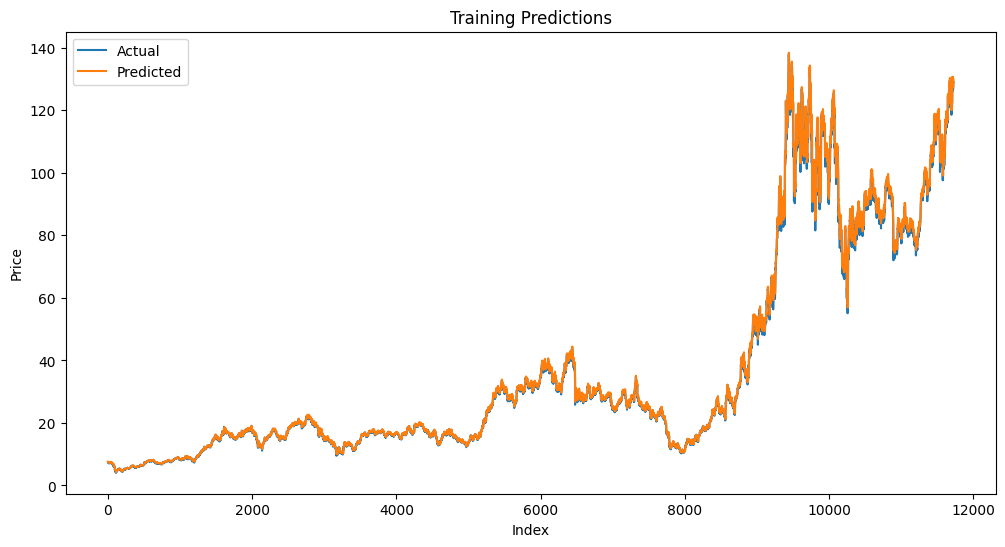

In [ ]:
# Generating predictions
train_predictions = baseline_model_modified.predict(train_windows)

# Plot training predictions
plt.figure(figsize=(12, 6))
plt.plot(train_labels, label='Actual')
plt.plot(train_predictions, label='Predicted')
plt.title('Training Predictions')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.show()

Output diatas menunjukkan grafik hasil prediksi dengan nilai asli data yang ada. Nilai prediksi yang dihasilkan merupakan hasil model uji menggunakan training set. Grafik menunjukkan hasil yang cukup baik, karena garis antar keduanya hampir sama (mendekati titik/garis yang sama).

46/46 [==============================] - 0s 3ms/step


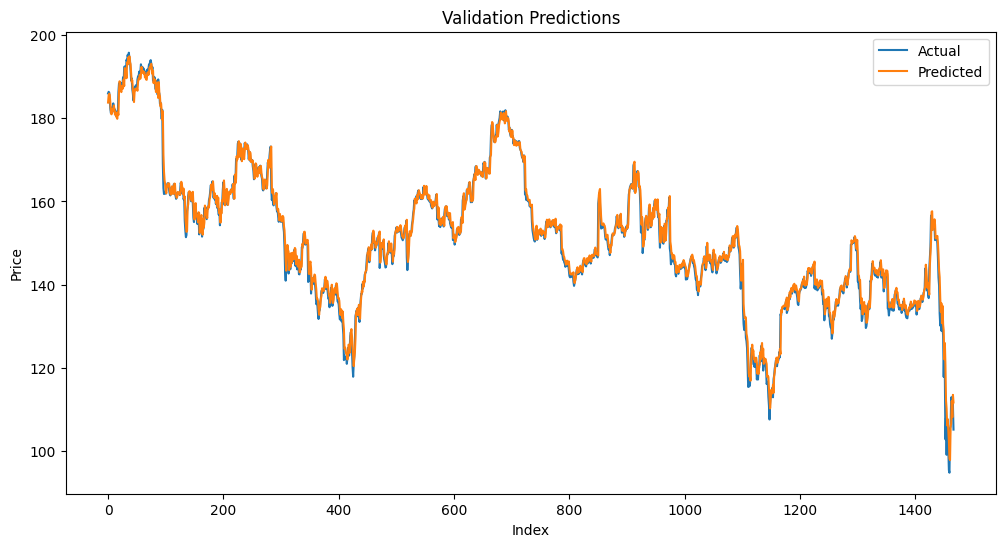

In [ ]:
# Generating predictions
val_predictions = baseline_model_modified.predict(val_windows)

# Plot validation predictions
plt.figure(figsize=(12, 6))
plt.plot(val_labels, label='Actual')
plt.plot(val_predictions, label='Predicted')
plt.title('Validation Predictions')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.show()

Output diatas menunjukkan grafik hasil prediksi dengan nilai asli data yang ada. Nilai prediksi yang dihasilkan merupakan hasil model uji menggunakan validation set. Grafik menunjukkan hasil yang cukup baik, karena garis antar keduanya hampir sama (mendekati titik/garis yang sama).

46/46 [==============================] - 0s 3ms/step


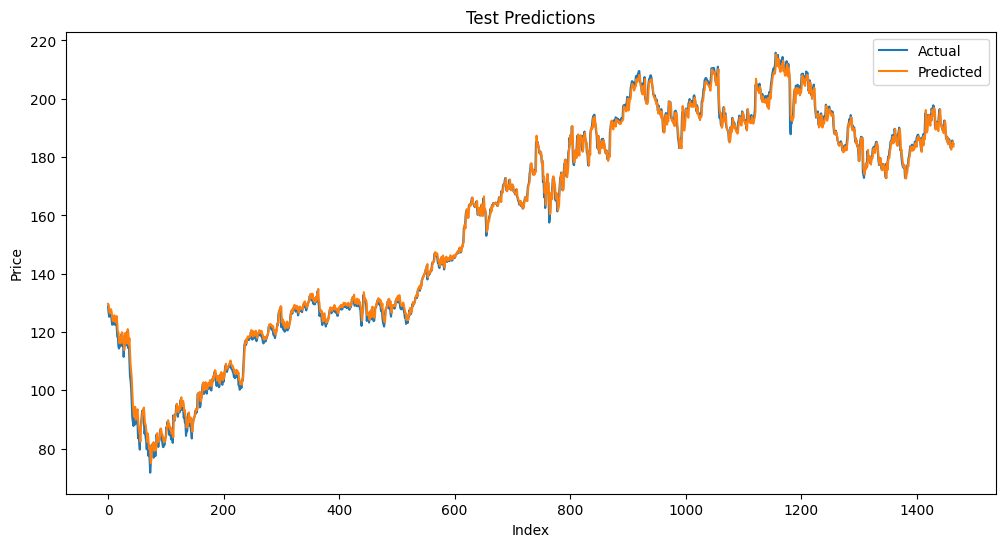

In [ ]:
# Generating predictions
test_predictions = baseline_model_modified.predict(test_windows)

# Plot test predictions
plt.figure(figsize=(12, 6))
plt.plot(test_labels, label='Actual')
plt.plot(test_predictions, label='Predicted')
plt.title('Test Predictions')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.show()

Output diatas menunjukkan grafik hasil prediksi dengan nilai asli data yang ada. Nilai prediksi yang dihasilkan merupakan hasil model uji menggunakan testing set. Grafik menunjukkan hasil yang cukup baik, karena garis antar keduanya hampir sama (mendekati titik/garis yang sama).

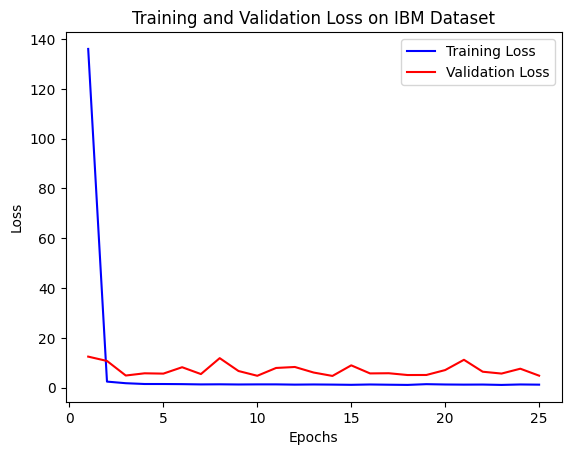

In [ ]:
# Get training and validation loss from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot training and validation loss
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss on IBM Dataset')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



*   Grafik training loss sangat tinggi di awal, tetapi mengalami penurunan yang dratis dan stabil saat model diuji. Ini menunjukkan hasil yang baik, karena nilai loss semakin rendah dan stabil.
*   Grafik validation loss mengalami kenaikan dan penurunan di pertengahan iterasi saat model diuji, tetapi pada akhirnya menurun. Hal ini menandakan nilai loss yang semakin kecil.
*   Hasil akhir dari pengujian model menunjukkan grafik training dan validation loss yang rendah dan stabil. Ini sangat baik karena menandakan nilai yang semakin kecil dalam memprediksi kesalahan.


###**Evaluation on FB Dataset**

In [ ]:
# Predict on the test set
baselinepredictions2 = baselinemodel2.predict(test_windows2)

# Flatten the predictions and test labels to 1D arrays
baselinepredictions2.flatten()
test_labels2.flatten()

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(test_labels2, baselinepredictions2))
mae = mean_absolute_error(test_labels2, baselinepredictions2)
mape = mean_absolute_percentage_error(test_labels2, baselinepredictions2)

print("Baseline Model:")
print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)

7/7 [==============================] - 0s 4ms/step
Baseline Model:
RMSE: 3.9368858
MAE: 2.8824227
MAPE: 0.01820788


*   Baseline model pertama untuk FB dataset dilakukan dengan pengujian data testing.
*   Nilai baseline diratakan menggunakan function `flatten` agar keduanya menjadi array 1 dimensi sebelum dihitung performa evaluasinya.
*   RMSE digunakan untuk menghitung rata-rata kesalahan prediksi harga saham (satuan sama dengan data aslinya / harga saham). MAE untuk mengukur rata-rata kesalahan absolut prediksi. Sedangkan, MAPE mengukur rata-rata persentase kesalahan prediksi (satuan persen).

*   Dengan nilai RMSE 3.9, berarti model memiliki rata-rata kesalahan prediksi harga saham sebesar 3.9. Angka ini cukup baik mengingat dataset yang digunakan terdiri dari ribuan data.
*    Dengan nilai MAE 2.8, berarti model memiliki rata-rata kesalahan absolut harga saham sebesar 2.8.
*   Dengan nilai MAPE 0.0182, berarti model memiliki rata-rata presentase kesalahan prediksi harga saham sebesar 1,82%.
*   Output diatas menampilkan hasil dari nilai RMSE, MAE, dan MAPE yang sudah cukup baik, ketiganya menunjukkan nilai yang mendekati angka 0. Semakin kecil angka RMSE, MAE, dan MAPE maka semakin kecil kesalahan prediksi yang dilakukan oleh model.









In [ ]:
# Predict on the test set
modifiedpredictions2 = baselinemodel2_modified.predict(test_windows2)

# Flatten the predictions and test labels to 1D arrays
modifiedpredictions2.flatten()
test_labels2.flatten()

# Calculate evaluation metrics
modifiedrmse = np.sqrt(mean_squared_error(test_labels2, modifiedpredictions2))
modifiedmae = mean_absolute_error(test_labels2, modifiedpredictions2)
modifiedmape = mean_absolute_percentage_error(test_labels2, modifiedpredictions2)

print("Modified Model:")
print("RMSE:", modifiedrmse)
print("MAE:", modifiedmae)
print("MAPE:", modifiedmape)

7/7 [==============================] - 0s 3ms/step
Modified Model:
RMSE: 3.9019256
MAE: 2.842364
MAPE: 0.017900469


*   Evaluasi model setelah dimodifikasi dan dilakukan uji menggunakan data testing. Evaluasi dilakukan dengan mengecek kembali nilai RMSE, MAE, dan MAPE.
*   Nilai model modifikasi diratakan menggunakan function `flatten` agar keduanya menjadi array 1 dimensi sebelum dihitung performa evaluasinya.

*   Dengan nilai RMSE 3.9, berarti adanya kenaikan dari nilai RMSE setelah model dimodifikasi. Nilai ini menunjukkan model memiliki rata-rata kesalahan prediksi harga saham yang semakin kecil, yaitu 3.9.
*    Nilai MAE 2.8, berarti berarti adanya kenaikan dari nilai MAE setelah model dimodifikasi. Nilai ini menunjukkan model memiliki rata-rata kesalahan absolut harga saham yang semakin kecil, yaitu 2.8.
*   Dengan nilai MAPE 0.017, berarti berarti adanya kenaikan dari nilai MAPE setelah model dimodifikasi. Nilai ini menunjukkan model memiliki rata-rata presentase kesalahan prediksi harga saham yang semakin kecil, yaitu 1,17%.
*   Output diatas menampilkan hasil dari nilai RMSE, MAE, dan MAPE yang semakin kecil, berarti adanya peningkatan dari ketiga metriks evaluasi. Nilai dari model pertama dengan model yang sudah dimodifikasi menunjukkan adanya penurunan dari jumlah kesalahan prediksi yang dibuat model.








50/50 [==============================] - 0s 3ms/step


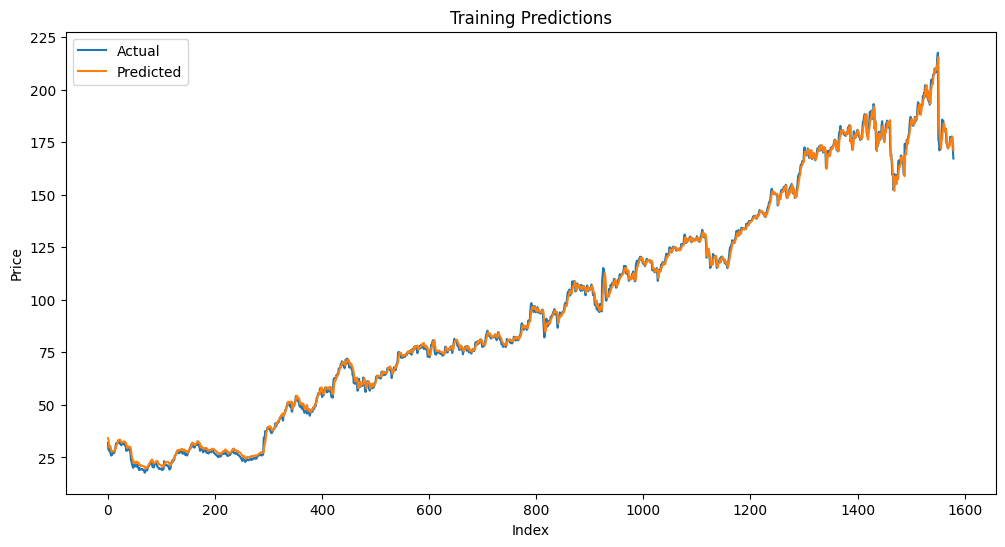

In [ ]:
# Generating predictions
train_predictions2 = baselinemodel2_modified.predict(train_windows2)

# Plot training predictions
plt.figure(figsize=(12, 6))
plt.plot(train_labels2, label='Actual')
plt.plot(train_predictions2, label='Predicted')
plt.title('Training Predictions')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.show()

Output diatas menunjukkan grafik hasil prediksi dengan nilai asli data yang ada. Nilai prediksi yang dihasilkan merupakan hasil model uji menggunakan training set. Grafik menunjukkan hasil yang cukup baik, karena garis antar keduanya hampir sama (mendekati titik/garis yang sama).

7/7 [==============================] - 0s 4ms/step


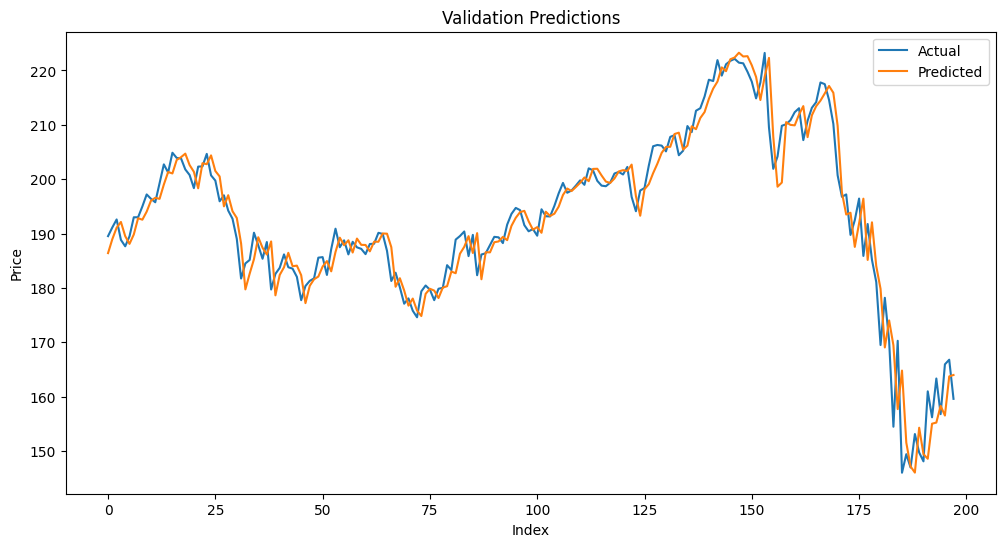

In [ ]:
# Generating predictions
val_predictions2 = baselinemodel2_modified.predict(val_windows2)

# Plot validation predictions
plt.figure(figsize=(12, 6))
plt.plot(val_labels2, label='Actual')
plt.plot(val_predictions2, label='Predicted')
plt.title('Validation Predictions')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.show()

Output diatas menunjukkan grafik hasil prediksi dengan nilai asli data yang ada. Nilai prediksi yang dihasilkan merupakan hasil model uji menggunakan validation set. Grafik menunjukkan hasil yang baik.

Walaupun ada beberapa garis dan titik prediksi yang tidak berdekatan tetapi secara keseluruhan model dapat memprediksi dengan sesuai. Hal ini dapat dilihat dari grafik, sebagian besar nilai data asli dan prediksi berdekatan (hampir berada di garis/titik yang sama)

7/7 [==============================] - 0s 4ms/step


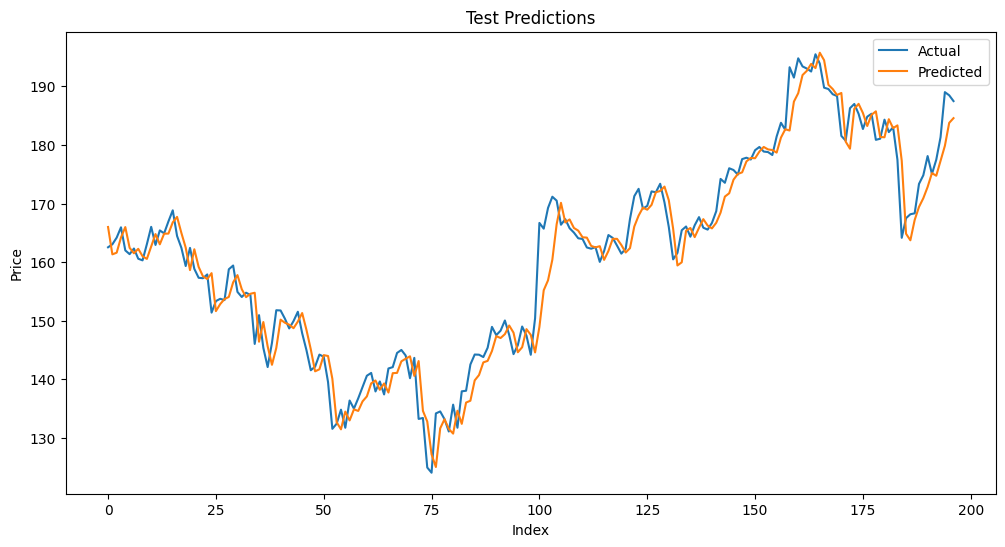

In [ ]:
# Generating predictions
test_predictions2 = baselinemodel2_modified.predict(test_windows2)

# Plot test predictions
plt.figure(figsize=(12, 6))
plt.plot(test_labels2, label='Actual')
plt.plot(test_predictions2, label='Predicted')
plt.title('Test Predictions')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.show()

Output diatas menunjukkan grafik hasil prediksi dengan nilai asli data yang ada. Nilai prediksi yang dihasilkan merupakan hasil model uji menggunakan testing set. Grafik menunjukkan hasil yang baik.

Walaupun ada beberapa garis dan titik prediksi yang tidak berdekatan tetapi secara keseluruhan model dapat memprediksi dengan sesuai. Hal ini dapat dilihat dari grafik, sebagian besar nilai data asli dan prediksi berdekatan (hampir berada di garis/titik yang sama)

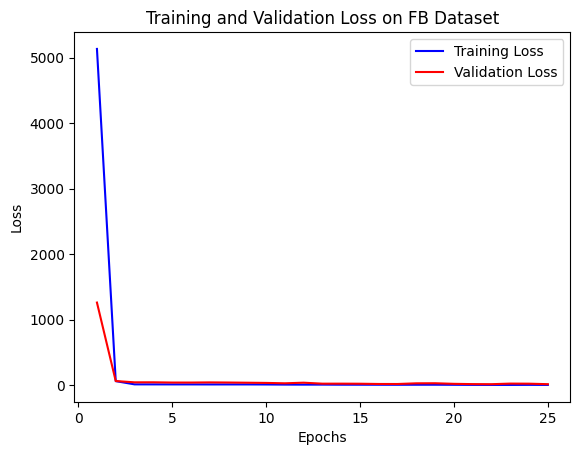

In [ ]:
# Get training and validation loss from history
train_loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

# Plot training and validation loss
epochs = range(1, len(train_loss2) + 1)
plt.plot(epochs, train_loss2, 'b', label='Training Loss')
plt.plot(epochs, val_loss2, 'r', label='Validation Loss')
plt.title('Training and Validation Loss on FB Dataset')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



*   Grafik training loss sangat tinggi di awal, tetapi mengalami penurunan yang dratis dan sangat stabil saat model diuji. Ini menunjukkan hasil yang baik, karena nilai loss semakin rendah dan stabil.
*   Grafik validation loss cukup tinggi di awal, tetapi mengalami penurunan yang cukup dratis dan sangat stabil saat model diuji. Hal ini menandakan nilai loss yang semakin kecil.
*   Hasil akhir dari pengujian model menunjukkan grafik training dan validation loss yang rendah dan stabil. Ini sangat baik karena menandakan nilai yang semakin kecil dalam memprediksi kesalahan.


##**e. Video Presentasi**

Link Video : https://youtu.be/ypHnIwYsllQ